In [126]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [127]:
img1 = cv.imread('/content/images_01.jpg')          # queryImage
img2 = cv.imread('/content/images_02.jpg')  # trainImage


In [128]:
sift = cv.SIFT_create()


In [129]:
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

In [130]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)


In [131]:
list_kp1 = []
list_kp2 = []

In [132]:
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append(m)
        list_kp1.append(kp1[m.queryIdx].pt)
        list_kp2.append(kp2[m.trainIdx].pt)


In [133]:
MIN_MATCH_COUNT = 5

In [134]:
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    # h,w, _ = img1.shape
    # pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    # dst = cv.perspectiveTransform(pts,M)
    # img2 = cv.polylines(img2,[np.int32(dst)],True,255,3, cv.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None

In [135]:
for kp_coor, mark in zip(list_kp1, matchesMask):
    if mark == 1:
        cv.circle(img1, (int(kp_coor[0]), int(kp_coor[1])), radius=20, color = (255, 0, 0), thickness =2)

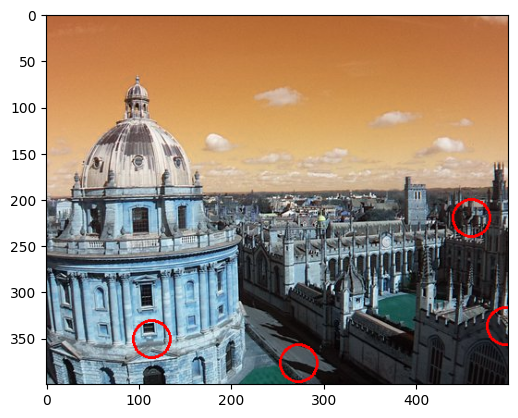

In [136]:
plt.imshow(img1)
plt.show()

In [137]:
for kp_coor, mark in zip(list_kp2, matchesMask):
    if mark == 1:
        cv.circle(img2, (int(kp_coor[0]), int(kp_coor[1])), radius=20, color = (255, 0, 0), thickness =2)

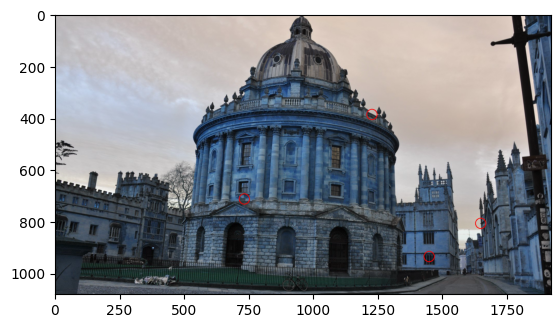

In [138]:
plt.imshow(img2)
plt.show()

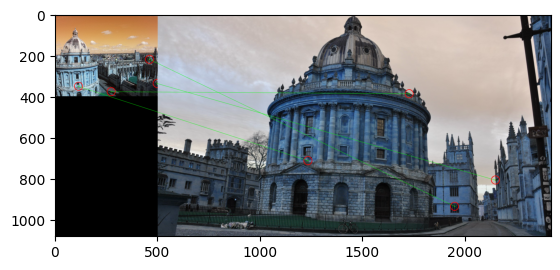

In [139]:
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
img3 = cv.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
plt.imshow(img3)
plt.show()